In [1]:
import pandas as pd

from DataPreparation import read_data
from DataPreparation import calc_entropy, plot_boxplots, numerical_vs_categorical_barplots
from DataPreparation import association_bet_ordinal_columns, nominal_columns_dependency, ordinal_statistics, nominal_statistics

### Read the Data

In [2]:
x_data, y_data = read_data(split='train', scales=['numerical', 'categorical', 'ordinal'], encode=False)
df = pd.concat([x_data.toPandas(), y_data.toPandas()], axis=1)

# Retrieve numerical, ordinal, nominal column names 
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 
nominal_columns = df.select_dtypes(include=['object']).columns.to_list()
ordinal_columns = [col for col in df.columns if (col not in numerical_columns and col not in nominal_columns) ]

target_variable = y_data.columns[0]

df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_index
0,13,460,25,18.0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,...,3,5,5,4,3,4,4,5,5,0.0
1,25,235,1,6.0,Male,disloyal Customer,Business travel,Business,3,2,...,3,1,1,1,5,3,1,4,1,0.0
2,26,1142,0,0.0,Female,Loyal Customer,Business travel,Business,2,2,...,5,5,5,4,3,4,4,4,5,1.0
3,25,562,11,9.0,Female,Loyal Customer,Business travel,Business,2,5,...,2,2,2,2,5,3,1,4,2,0.0
4,61,214,0,0.0,Male,Loyal Customer,Business travel,Business,3,3,...,5,5,3,3,4,4,3,3,3,1.0


### Features Description and Type

| Variable Name                       | Variable Description                                              | Variable Type | Values                                                  |
| ----------------------------------- | ---------------------------------------------------------------- | -------------- | ------------------------------------------------------- |
| Gender                              | Gender of the passengers                                         | Nominal        | Female, Male                                            |
| Customer Type                       | The customer type                                                | Nominal        | Loyal customer, Disloyal customer                       |
| Age                                 | The actual age of the passengers                                | Numerical      | -                                                       |
| Type of Travel                      | Purpose of the flight of the passengers                         | Nominal        | Personal Travel, Business Travel                       |
| Class                               | Travel class in the plane of the passengers                     | Nominal        | Business, Eco, Eco Plus                                |
| Flight Distance                     | The flight distance of this journey                             | Numerical      | -                                                       |
| Inflight wifi service               | Satisfaction level of the inflight wifi service                 | Ordinal        | 1, 2, 3, 4, 5                                          |
| Departure/Arrival time convenient   | Satisfaction level of Departure/Arrival time convenient         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Ease of Online booking              | Satisfaction level of online booking                            | Ordinal        | 1, 2, 3, 4, 5                                          |
| Gate location                       | Satisfaction level of Gate location                             | Ordinal        | 1, 2, 3, 4, 5                                          |
| Food and drink                      | Satisfaction level of Food and drink                            | Ordinal        | 1, 2, 3, 4, 5                                          |
| Online boarding                     | Satisfaction level of online boarding                           | Ordinal        | 1, 2, 3, 4, 5                                          |
| Seat comfort                        | Satisfaction level of Seat comfort                             | Ordinal        | 1, 2, 3, 4, 5                                          |
| Inflight entertainment              | Satisfaction level of inflight entertainment                    | Ordinal        | 1, 2, 3, 4, 5                                          |
| On-board service                    | Satisfaction level of On-board service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Leg room service                    | Satisfaction level of Leg room service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Baggage handling                    | Satisfaction level of baggage handling                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Check-in service                    | Satisfaction level of Check-in service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Inflight service                    | Satisfaction level of inflight service                         | Ordinal        | 1, 2, 3, 4, 5                                          |
| Cleanliness                         | Satisfaction level of Cleanliness                              | Ordinal        | 1, 2, 3, 4, 5                                          |
| Departure Delay in Minutes          | Minutes delayed when departure                                 | Numerical      | -                                                       |
| Arrival Delay in Minutes            | Minutes delayed when Arrival                                   | Numerical      | -                                                       |
| Satisfaction                        | Airline satisfaction level                                     | Nominal        | Satisfaction, Neutral, Dissatisfaction                 |


### Central Tendancy and Spread of features
Measures computed for each type
- For Numerical: Mean, Median, std, 1st and 3rd quartiles
- For Ordinal: Mode, Median, IQR, entropy
- For Nominal: Mode, entropy

In [3]:
# Studing the central Tendancy and spread of Numerical Features
df.loc[:, numerical_columns].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Conclusions:
- All ages are represented in the data with a balanced frequency
- The majority (75%) of delays are below 13 minutes, with very few cases exceeding this threshold. These cases may indicate a disaster or a serious circumstance that requires investigation. As such, they can be considered as outliers, as they are rare and not representative of the normal cases.

In [4]:
ordinal_statistics(df, ordinal_columns)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_index
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0
50%,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0
75%,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,1.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0
mode,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0


Conclusions:
- Seat comfort, inflight service, and baggage handling received high ratings, with 50% of the flights rating them as 4 or above.

In [5]:
nominal_statistics(df, ordinal_columns)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction_index
mode,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
Entropy,1.658716,1.712461,1.698000,1.578593,1.594761,1.631325,1.548000,1.569293,1.555106,1.583216,1.468852,1.549883,1.463975,1.577594,0.684232
Max Entropy,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.791759,1.609438,1.791759,1.791759,1.791759,0.693147


Conclusion:
- All nominal variables has a large entropy value which indicate low predictability (similar as if the data is random which indicates variability). This is likely due to the categorical variables being more evenly distributed across multiple categories, resulting in a higher entropy value.
- Applies at a less extend to loyal customers.

## Multivariate Insights & Visualizations

### Distribution of numerical variables per class

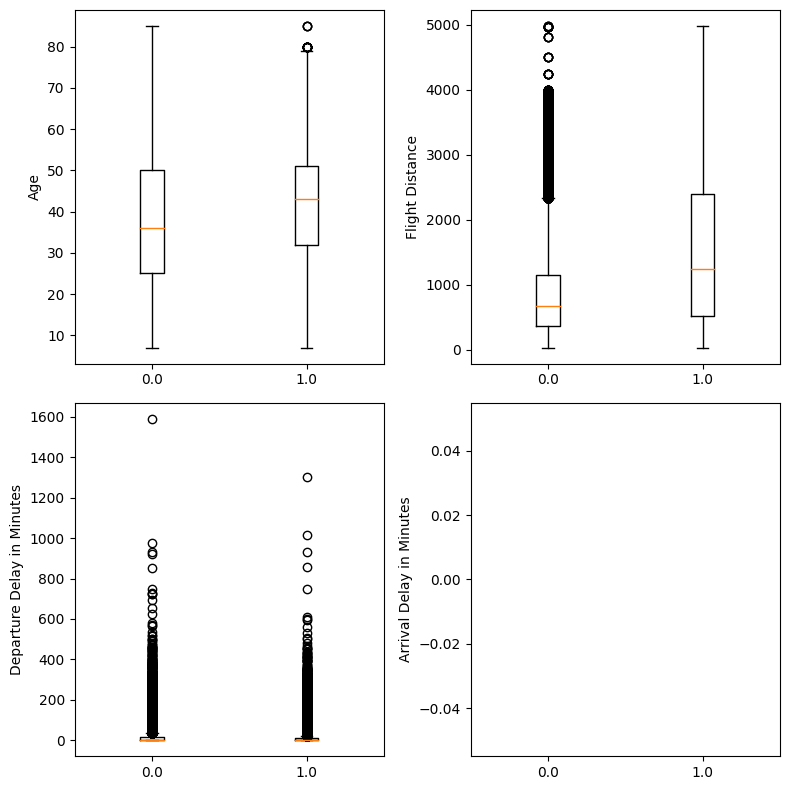

In [6]:
plot_boxplots(df, numerical_columns, target_variable)

### Distribution of numerical and categorical combinations per class

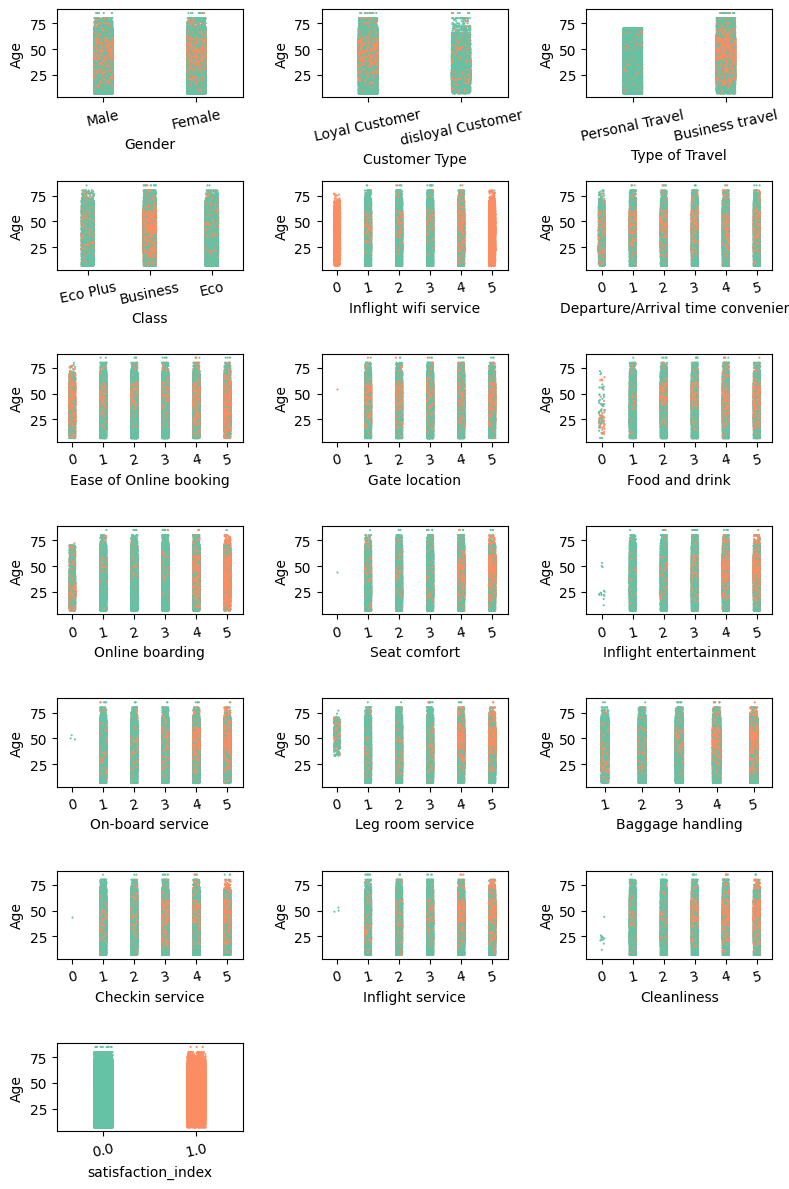

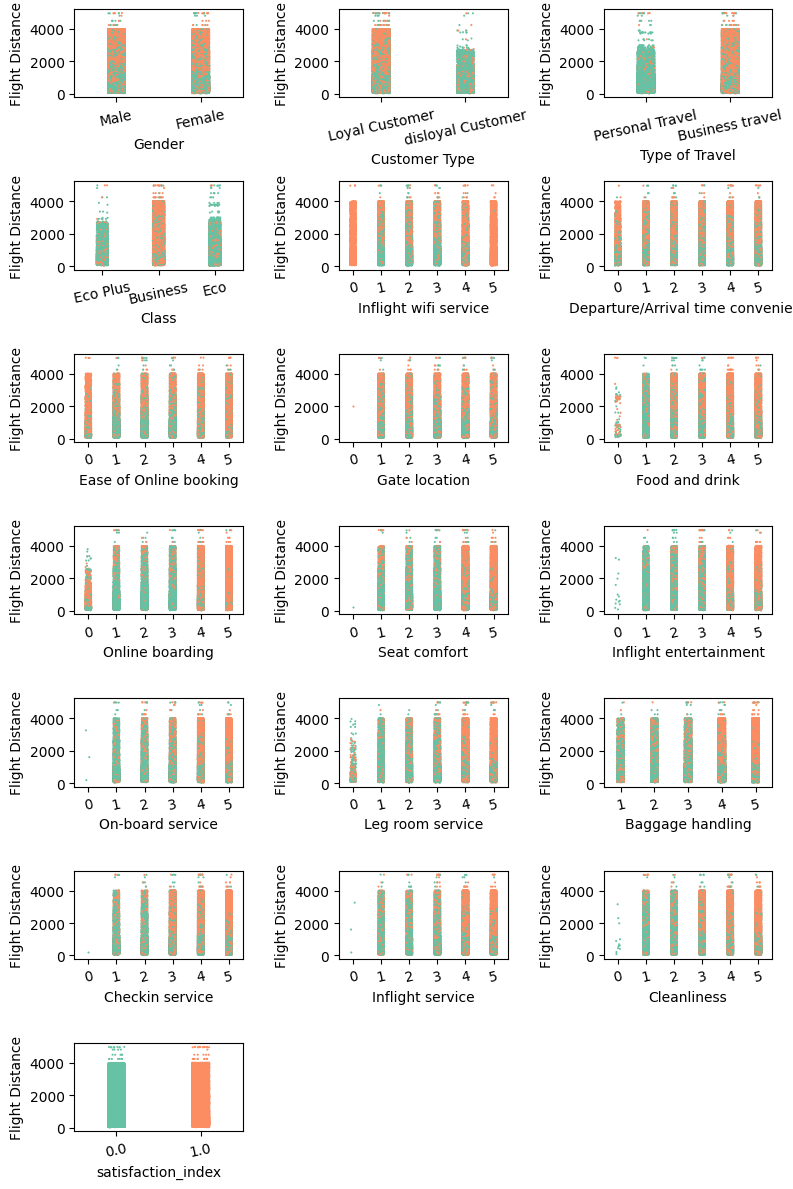

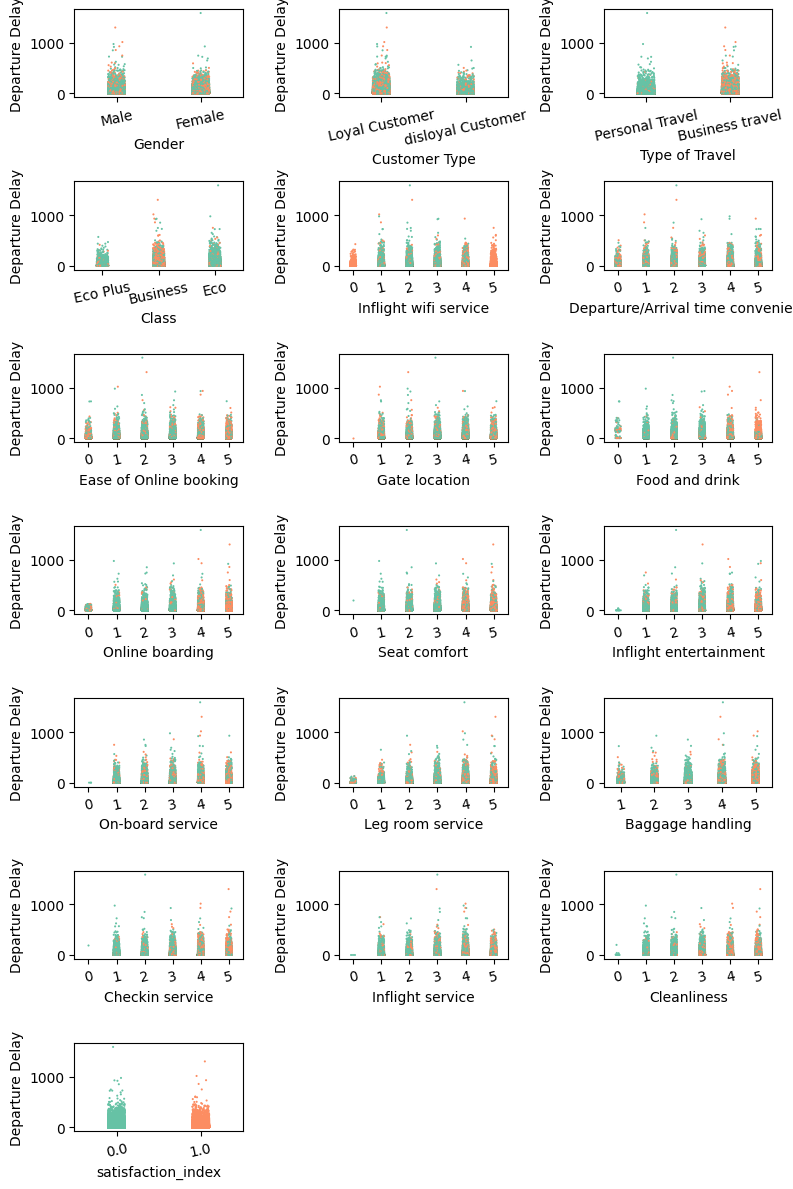

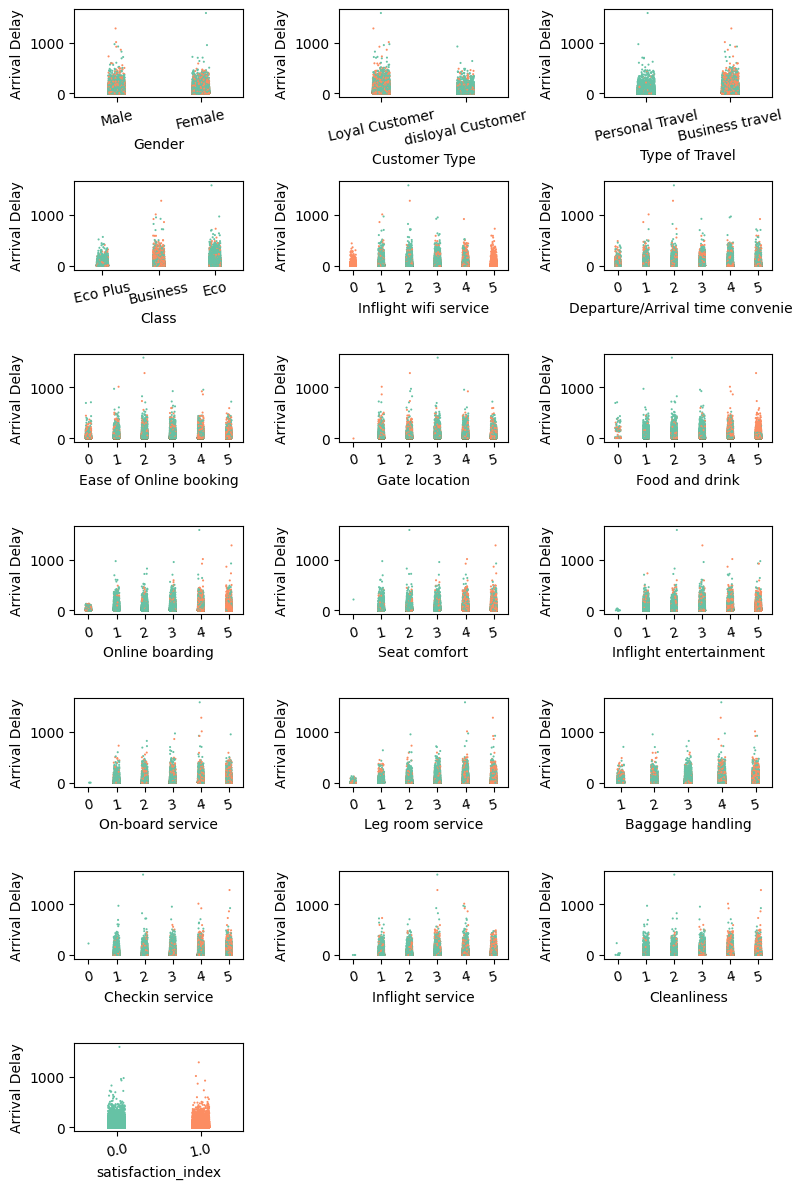

In [7]:
numerical_vs_categorical_barplots(nominal_columns, ordinal_columns, numerical_columns, target_variable, df)

### Independence between nominal variables
P-value smaller than 0.05 indicates dependancy

In [8]:
nominal_columns_dependency(df, nominal_columns)

,Gender,Customer Type,Type of Travel,Class
Gender,0.0,0.0,0.026398,0.000119
Customer Type,0.0,0.0,0.0,0.0
Type of Travel,0.026398,0.0,0.0,0.0
Class,0.000119,0.0,0.0,0.0


### Monotonic Association between ordinal variables

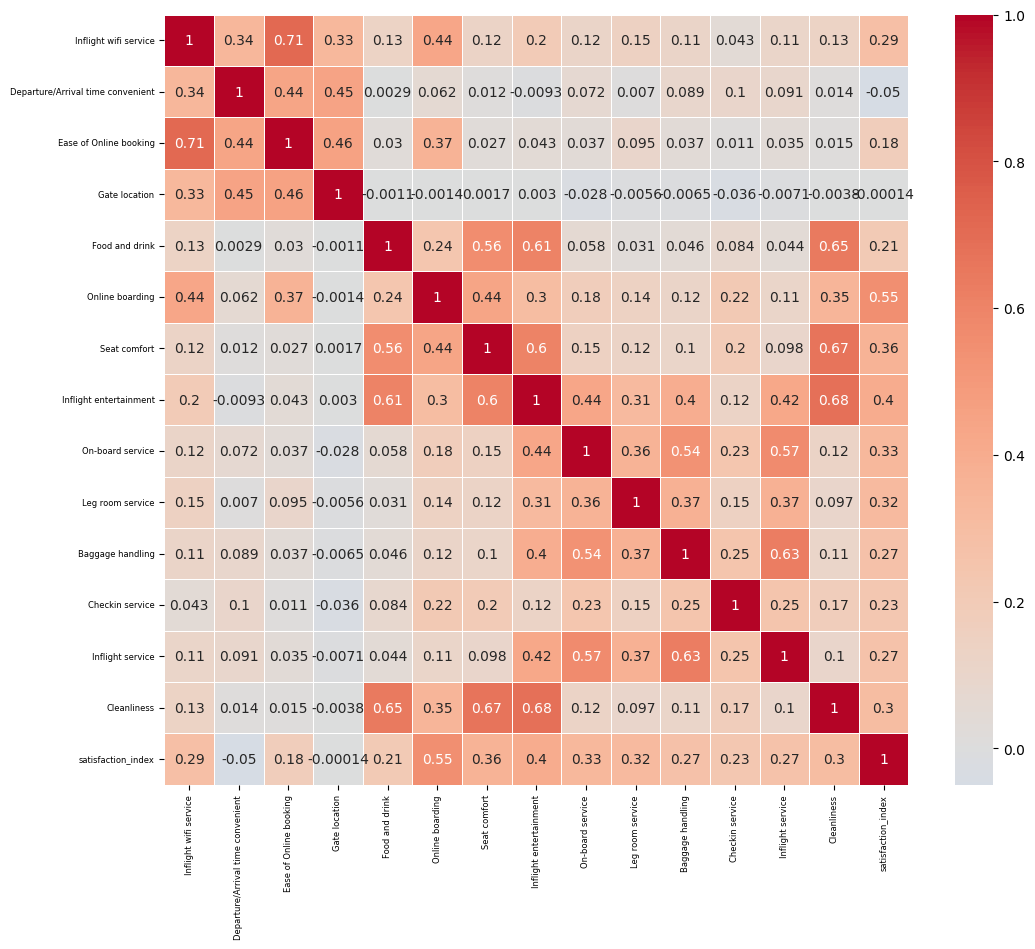

In [9]:
association_bet_ordinal_columns(df, ordinal_columns)

Conclusions:
- High correlation between Ease of online booking and quality of wifi service. 
    - Yet can't interpret this correlation.
- It seems that flights that have high cleanliness also have good food, comfort seat and good entertainment, where there exists High Correlation between:
    - Cleanliness and food and drink
    - Cleanliness and seatcomfort
    - Cleanliness and inflight entertainment
